<img src=https://raw.githubusercontent.com/hoittoken/Python/master/Py/project_4/logo_p4.png>

# Проект: классификация

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [3]:
df = pd.read_csv('bank_fin.zip', sep = ';')

In [4]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


### Задание 2

In [5]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

### Задание 3

In [6]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df['balance'] = df['balance'].apply(lambda x: float(x.replace(' ','').replace(',','.').replace('$','')) if type(x) == str else x)

### Задание 4

In [7]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
df['balance'] = df['balance'].fillna(df['balance'].median())

### Задание 5

In [8]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
df['job'] = df['job'].replace('unknown', df['job'].mode()[0])
df['education'] = df['education'].replace('unknown', df['education'].mode()[0])

### Задание 6

In [9]:
# удалите все выбросы для признака balance
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<=lower_bound) | (x >= upper_bound)]
    cleaned = data[(x>=lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(df, 'balance')

print(f'Результирующее число записей: {cleaned.shape[0]}')

Результирующее число записей: 10105


In [10]:
df = cleaned

## Часть 2:  Разведывательный анализ

### Задание 1

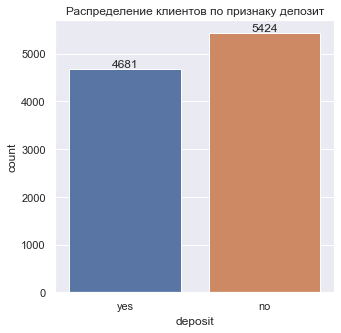

In [11]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
sns.set(style="darkgrid")
_, ax = plt.subplots(figsize=(5, 5))
ax.set_title('Распределение клиентов по признаку депозит')
sns.countplot(data=df, x='deposit')
ax.bar_label(ax.containers[0]);

### Задания 2 и 3

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


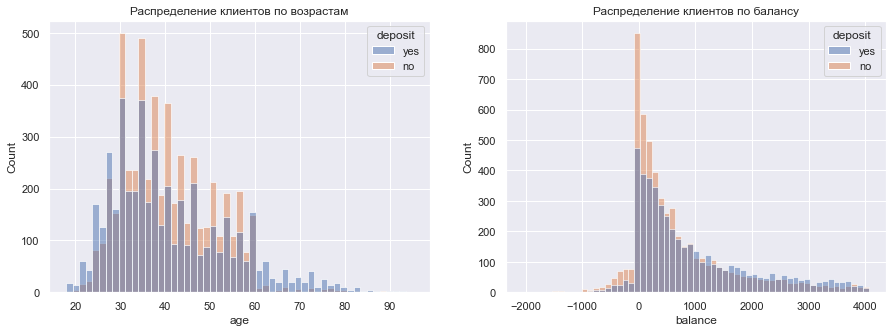

In [12]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
display(df.describe())
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(data=df[['age', 'deposit']], x='age', hue='deposit', ax=ax[0])
sns.histplot(data=df[['balance', 'deposit']], x='balance', hue='deposit', ax=ax[1])
ax[0].set_title('Распределение клиентов по возрастам')
ax[1].set_title('Распределение клиентов по балансу');

### Задания 4 и 5

In [13]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
df.describe(include=object)
#постройте визуализации, иллюстрирующие результаты

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


### Задание 6

In [14]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
df['poutcome'].value_counts()

unknown    7570
failure    1109
success     945
other       481
Name: poutcome, dtype: int64

### Задание 7

In [15]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
df['month'][df['deposit'] == 'no'].value_counts()

may    1776
jul     836
aug     775
jun     606
nov     456
feb     323
apr     317
jan     194
oct      62
sep      46
mar      24
dec       9
Name: month, dtype: int64

### Задание 8

In [16]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
def get_age(age):
    """_распределитель по возрастным группам_

    """
    if age <30:
        return '<30'
    elif 30 <= age < 40:
        return '30-40'
    elif 40 <= age < 50:
        return '40-50'
    elif 50 <= age < 60:
        return '50-60'
    else:
        return '60+'    

df['age_group'] = df['age'].apply(get_age)

df['age_group'][df['deposit'] == 'no'].value_counts()

30-40    2245
40-50    1444
50-60     984
<30       594
60+       157
Name: age_group, dtype: int64

### Задания 9 и 10

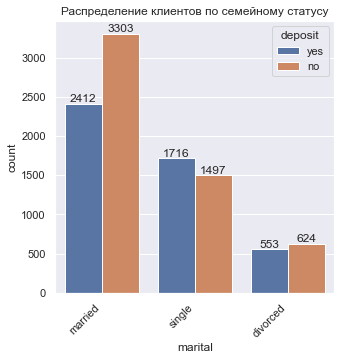

In [17]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
_, ax = plt.subplots(figsize=(5, 5))
ax.set_title('Распределение клиентов по семейному статусу')
plt.xticks(rotation=45, ha='right')
sns.countplot(data=df[['marital','deposit']], x='marital', hue='deposit')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

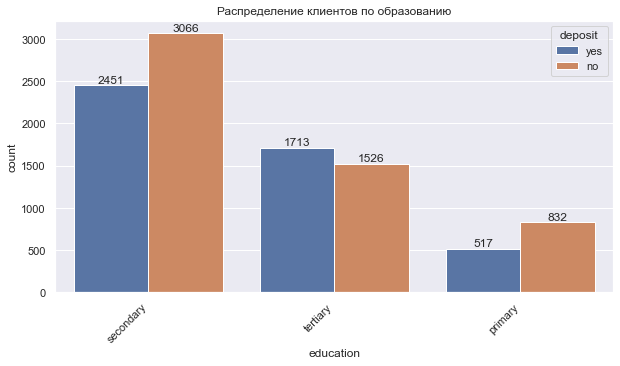

In [18]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
_, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Распределение клиентов по образованию')
plt.xticks(rotation=45, ha='right')
sns.countplot(data=df[['education','deposit']], x='education', hue='deposit')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

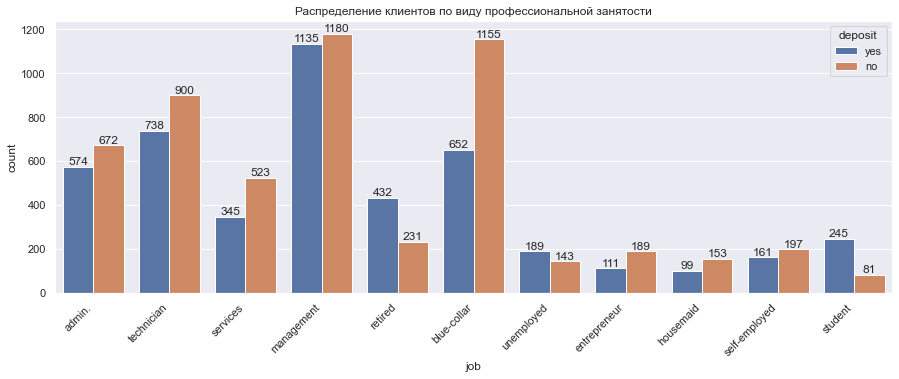

In [19]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
_, ax = plt.subplots(figsize=(15, 5))
ax.set_title('Распределение клиентов по виду профессиональной занятости')
plt.xticks(rotation=45, ha='right')
sns.countplot(data=df[['job','deposit']], x='job', hue='deposit')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

### Задание 11

In [20]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
display(df[['education', 'marital']][df['deposit'] == 'yes'].value_counts())

df[df['deposit'] == 'yes'].pivot_table(
    values='deposit',
    index='education',
    columns='marital',
    aggfunc='count'
)

education  marital 
secondary  married     1289
           single       879
tertiary   married      784
           single       755
primary    married      339
secondary  divorced     283
tertiary   divorced     174
primary    divorced      96
           single        82
dtype: int64

marital,divorced,married,single
education,,,
primary,96,339,82
secondary,283,1289,879
tertiary,174,784,755


## Часть 3: преобразование данных

### Задание 1

In [21]:
# преобразуйте уровни образования
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df['age_group'] = le.fit_transform(df['age_group'])
df['education'].sum()

11995

### Задания 2 и 3

In [22]:
# преобразуйте бинарные переменные в представление из нулей и единиц
df['deposit'] = df['deposit'].apply(lambda x: 1 if x=='yes' else 0)
df['default'] = df['default'].apply(lambda x: 1 if x=='yes' else 0)
df['housing'] = df['housing'].apply(lambda x: 1 if x=='yes' else 0)
df['loan'] = df['loan'].apply(lambda x: 1 if x=='yes' else 0)

### Задание 4

In [23]:
# создайте дамми-переменные
df = pd.get_dummies(df, columns=['job','marital','contact','month','poutcome'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10105 non-null  int64  
 1   education          10105 non-null  int32  
 2   default            10105 non-null  int64  
 3   balance            10105 non-null  float64
 4   housing            10105 non-null  int64  
 5   loan               10105 non-null  int64  
 6   day                10105 non-null  int64  
 7   duration           10105 non-null  int64  
 8   campaign           10105 non-null  int64  
 9   pdays              10105 non-null  int64  
 10  previous           10105 non-null  int64  
 11  deposit            10105 non-null  int64  
 12  age_group          10105 non-null  int32  
 13  job_admin.         10105 non-null  uint8  
 14  job_blue-collar    10105 non-null  uint8  
 15  job_entrepreneur   10105 non-null  uint8  
 16  job_housemaid      101

### Задания 5 и 6

<AxesSubplot:>

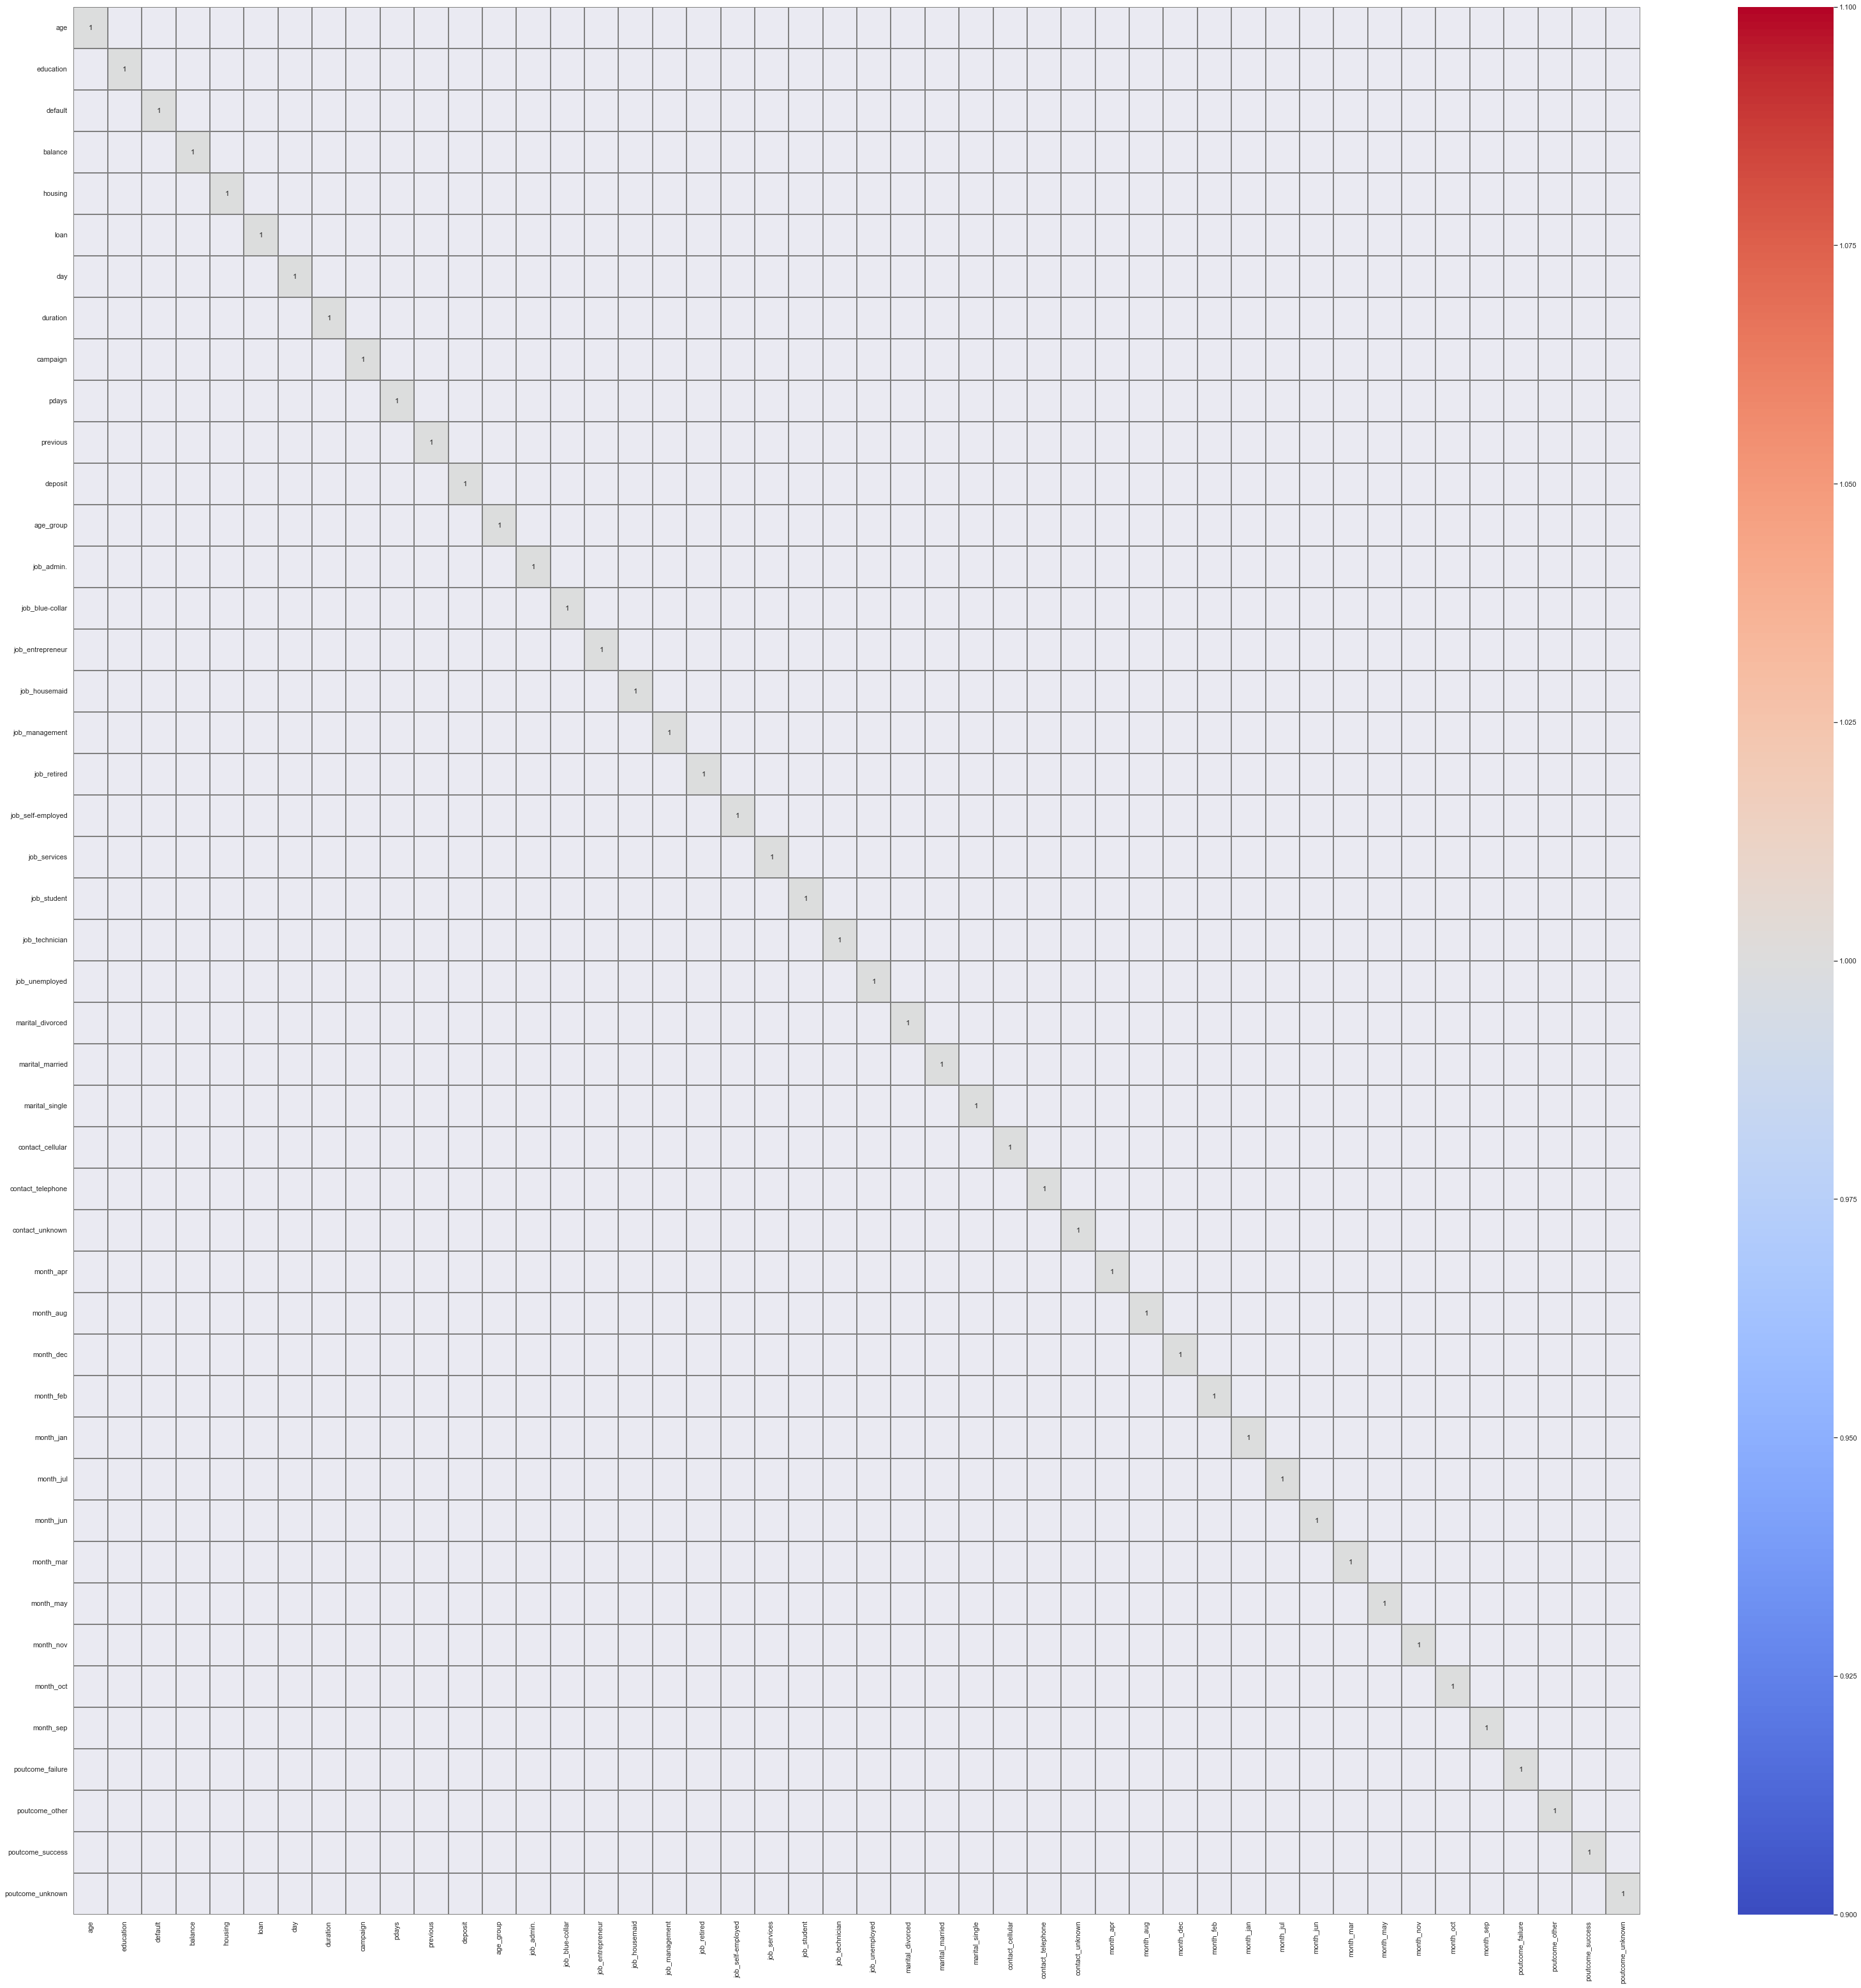

In [24]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
corr = df.corr()

# выведем только данные с высоким уровнем корреляции
mask_1 = np.abs(corr) >= 0.9
mask_2 = np.abs(corr) <= -0.9

corr_data = corr[mask_1 | mask_2]


# проверка признака на мультиколлинеарность
plt.rcParams['figure.figsize'] = (55,55)
sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidth=0.3, linecolor='gray')

### Задания 7 и 8

In [25]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [26]:
X_test.shape

(3335, 45)

In [27]:
# рассчитайте необходимые показатели
round(y_test.mean(), 2)

0.46

### Задание 9

In [28]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
#selector = SelectKBest(score_func=f_classif, k=15)
#selector.fit(X_train, y_train)
# сохраним отобранные признаки
#kbest_selection = selector.get_feature_names_out()



### Задание 10

In [29]:
kbest_selection = ['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'age_group', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown', 'deposit']
# выполним срез по полученным KBest признакам
df = df[kbest_selection]

In [30]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [31]:
# нормализуйте данные с помощью minmaxsxaler
mm_scaler = preprocessing.MinMaxScaler()
mm_scaler.fit(X_train)
X_train_scaled = mm_scaler.transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

In [32]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [33]:
# обучите логистическую регрессию и рассчитайте метрики качества
model_lr = linear_model.LogisticRegression(solver='sag', max_iter=1000, random_state=42)

model_lr.fit(X_train_scaled, y_train)
y_test_pred = model_lr.predict(X_test_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(metrics.accuracy_score(y_test_pred, y_test)))
print("accuracy на тестовом наборе: {:.2f}".format(model_lr.score(X_test_scaled, y_test)))

accuracy на тестовом наборе: 0.80
accuracy на тестовом наборе: 0.80


### Задания 2,3,4

In [34]:
# обучите решающие деревья, настройте максимальную глубину
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
dt.fit(X_train_scaled, y_train)
y_train_pred = dt.predict(X_train_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(metrics.accuracy_score(y_train_pred, y_train)))

y_test_pred = dt.predict(X_test_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(metrics.accuracy_score(y_test_pred, y_test)))



accuracy на тестовом наборе: 1.00
accuracy на тестовом наборе: 0.75


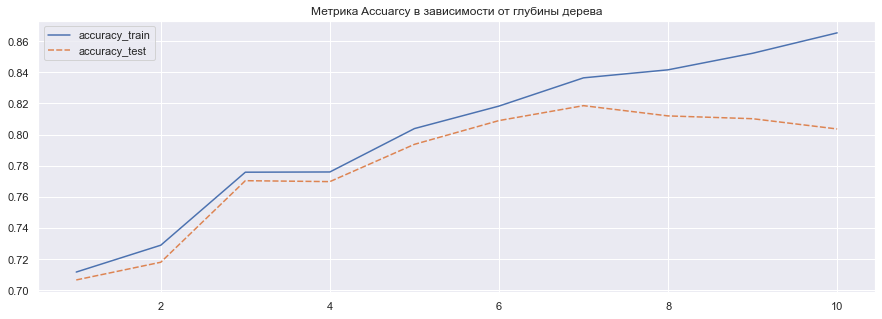

In [35]:
# подберем глубину дерева
def get_max_depth(depth):
    accuracy_train = []
    accuracy_test = []
    for i in range(1, depth+1):
        dt = tree.DecisionTreeClassifier(
            criterion='entropy',
            max_depth=i,
            random_state=42
        )
        dt.fit(X_train_scaled, y_train)
        y_train_pred = dt.predict(X_train_scaled)
        accuracy_train.append(metrics.accuracy_score(y_train_pred, y_train))
        y_test_pred = dt.predict(X_test_scaled)
        accuracy_test.append(metrics.accuracy_score(y_test_pred, y_test))
    result = pd.DataFrame([accuracy_train, accuracy_test], index=['accuracy_train', 'accuracy_test'], columns=range(1, depth+1))
    _, ax = plt.subplots(figsize=(15, 5))
    ax.set_title('Метрика Accuarcy в зависимости от глубины дерева')
    sns.lineplot(data=result.T);
    return

get_max_depth(10)

In [36]:
# подбираем глубину
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,
    random_state=42
)
dt.fit(X_train_scaled, y_train)
y_train_pred = dt.predict(X_train_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(metrics.accuracy_score(y_train_pred, y_train)))

y_test_pred = dt.predict(X_test_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(metrics.accuracy_score(y_test_pred, y_test)))

accuracy на тестовом наборе: 0.82
accuracy на тестовом наборе: 0.81


### Задание 5

In [37]:
# подберите оптимальные параметры с помощью gridsearch
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_split': [2, 5, 7, 10],
              'max_depth' : [3, 5, 7]              
              }
# Запускаем GridSearchCV для перебора заданных параметров
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)
grid_search_dt.fit(X_train_scaled, y_train) 
# Делаем предсказания и снимаем метрики на лучших из найденных параметрах
y_test_pred = grid_search_dt.predict(X_test_scaled)
print('accuracy на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_dt.best_params_))

accuracy на тестовом наборе: 0.81
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 10}


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [38]:
# обучите на ваших данных случайный лес
rf = ensemble.RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10
)

# Обучаем модель и снимаем метрику
rf.fit(X_train_scaled, y_train)

y_test_pred = rf.predict(X_test_scaled)
print('accuracy на тестовом наборе: {:.2f}'.format(metrics.accuracy_score(y_test_pred, y_test)))
print('recall на тестовом наборе: {:.2f}'.format(metrics.recall_score(y_test_pred, y_test)))
print('f1 на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test_pred, y_test)))

accuracy на тестовом наборе: 0.83
recall на тестовом наборе: 0.80
f1 на тестовом наборе: 0.82


### Задания 2 и 3

In [39]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(
    learning_rate=0.05, #темп обучения
    n_estimators=300, #число деревьев
    min_samples_leaf=5,
    max_depth=5, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
gb.fit(X_train_scaled, y_train)
y_pred = gb.predict(X_test)
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.46      0.63      3335

    accuracy                           0.46      3335
   macro avg       0.50      0.23      0.32      3335
weighted avg       1.00      0.46      0.63      3335



### Задание 4

In [40]:
# объедините уже известные вам алгоритмы с помощью стекинга
from sklearn.ensemble import StackingClassifier
estimators = [
    ('dt', tree.DecisionTreeClassifier(
        criterion='entropy',
        max_depth=6,
        random_state=42)),
    ('model_lr', linear_model.LogisticRegression(
        solver='sag', 
        max_iter=1000, 
        random_state=42)),
    ('gb', GradientBoostingClassifier(
        learning_rate=0.05,
        n_estimators=300,
        min_samples_leaf=5,
        max_depth=5,
        random_state=42))
] 

reg = StackingClassifier(
    estimators=estimators,
    final_estimator=linear_model.LogisticRegression(
        solver='sag', 
        max_iter=1000, 
        random_state=42)
)
reg.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=6,
                                                       random_state=42)),
                               ('model_lr',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42,
                                                   solver='sag')),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=5,
                                                           min_samples_leaf=5,
                                                           n_estimators=300,
                                                           random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000,
      

In [41]:
y_stack = reg.predict(X_test_scaled)
print(metrics.classification_report(y_stack, y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1781
           1       0.81      0.80      0.81      1554

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



### Задание 5

In [42]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
from sklearn.feature_selection import RFE
 
estimator = gb = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42
)
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
 
selector.get_feature_names_out()


array(['balance', 'duration', 'poutcome_success'], dtype=object)

In [43]:
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, mutual_info_classif, mutual_info_regression, chi2
selector = SelectKBest(f_classif, k=3)
selector.fit(X_train_scaled, y_train)
 
selector.get_feature_names_out()

array(['duration', 'contact_unknown', 'poutcome_success'], dtype=object)

### Задания 6,7,8

In [44]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
import optuna
print("Версия Optuna: {}".format(optuna.__version__))

Версия Optuna: 3.0.4


In [45]:
def optuna_rf(trial):
    # задаем пространства поиска гиперпараметров
    n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
    max_depth = trial.suggest_int('max_depth', 10, 30, 1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

    # создаем модель
    model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                            max_depth=max_depth,
                                            min_samples_leaf=min_samples_leaf,
                                            random_state=42)
  # обучаем модель
    model.fit(X_train_scaled, y_train)
    score = metrics.f1_score(y_train, model.predict(X_train_scaled))

    return score

In [46]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2023-01-10 10:54:21,329] A new study created in memory with name: RandomForestClassifier
[I 2023-01-10 10:54:21,934] Trial 0 finished with value: 0.8518634512997181 and parameters: {'n_estimators': 135, 'max_depth': 21, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8518634512997181.
[I 2023-01-10 10:54:22,792] Trial 1 finished with value: 0.8422044276966557 and parameters: {'n_estimators': 198, 'max_depth': 10, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8518634512997181.
[I 2023-01-10 10:54:23,351] Trial 2 finished with value: 0.8690625000000001 and parameters: {'n_estimators': 113, 'max_depth': 26, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.8690625000000001.
[I 2023-01-10 10:54:23,922] Trial 3 finished with value: 0.8562030075187969 and parameters: {'n_estimators': 123, 'max_depth': 25, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.8690625000000001.
[I 2023-01-10 10:54:24,459] Trial 4 finished with value: 0.8913213448006254 and parameters: {'n_

CPU times: total: 16.1 s
Wall time: 16.4 s


In [47]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 179, 'max_depth': 30, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.93


In [48]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42, )
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.83
f1_score на тестовом наборе: 0.82
